<p><a target ="_self" href="https://colab.research.google.com/github/pjmartel/teaching/blob/master/enzymology/ECB_plot_pt.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a></p>


#### Gráfico Linear Directo de Eisenthal e Cornis-Bowden

Clique em cada célula por ordem, e carregue no botão "Play" do lado esquerdo.
Quando chegar à célula "Instruções", ler com atenção e prosseguir.

In [6]:
#@title Carregue em "Play"
# Import necessary modules
import numpy as np
import pandas as pd
import numpy.random as rnd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib import style,rcParams
from seaborn import regplot
from scipy.stats import linregress
from io import BytesIO, StringIO
style.use('default')
rcParams.update({'axes.grid': True})
rcParams.update({'errorbar.capsize': 2})
pd.options.display.float_format = '{:,.3g}'.format

In [7]:
#@title Carregue em "Play"
# This creates the "data" cell magic to allow for pasted
# values to be grabbed by the running cells. That's a good
# alternative to qgrid, not yet supported by colab.
from IPython.core.magic import  (
    Magics, magics_class, cell_magic, line_magic
)

@magics_class
class StoreData(Magics):


    def __init__(self, shell=None,  **kwargs):
        super().__init__(shell=shell, **kwargs)
        self._store = []
        # inject our store in user availlable namespace under __mystore
        # name
        shell.user_ns['__mystore'] = self._store

    @cell_magic
    def data(self, line, cell):
        """store the cell in the store"""
        self._store.append(cell)

    @line_magic
    def showdata(self, line):
        """show all recorded statements"""
        print(self._store)

    @line_magic
    def erasedata(self, line):
      "clear the shore"
      self._store = []

## use ipython load_ext mechanisme here if distributed
get_ipython().register_magics(StoreData)

In [8]:
#@title Carregue em Play
# Michaelis-Menten equation
def MM(K,V,s):
  return V*s/(K+s)

#### Instruções

Na célula abaixo, introduzir os valores de concentração e velocidade no seguinte formato:
```
%%data
c1  v11 v12 v13 ...
c2  v21 v22 v23 ...
c3  v31 v32 v32 ...
....
```
em que c1, c2,... são as concentrações e v11, v12, ... são os replicados de velocidade para a concentração c1, v21, v22, ... são os replicados para concentração c2, etc... (remova dos dados exemplificativos que se encontram na célula)

**NB1:** a linha `%%data` tem que estrar presente *antes* dos dados, ou o restante código não conseguirá ler os valores intruzidos.

**NB2:** os dados podem ser introduzidos com o separador decimal *vírguala*, ou *ponto*

Após introdução dos dados carregar no botão play dessa célula e no botão play da seguinte. Deverá ser exibida uma tabela contendo os valores introduzidps, bem com as médias e desviões padrões dos replicados (caso existam um ou mais replicados). 

In [9]:
%%data
1.000e-01 1.783e-01
3.000e-01 3.746e-01
5.000e-01 4.851e-01
7.000e-01 5.894e-01
9.000e-01 6.344e-01
1.100e+00 6.990e-01
1.300e+00 7.142e-01
1.500e+00 7.589e-01
1.700e+00 7.556e-01
1.900e+00 7.865e-01

In [10]:
#@title Carregue no botão "Play" para visualizar os dados introduzidos

# convert ',' decimal separator to '.'
def conv(x):
    return x.replace(',', '.').encode()

# read the above cell into a numpy array
data_np = np.genfromtxt(conv(x) for x in  StringIO(__mystore[-1])  )

# create an empy pandas data frame with the
# npoint lines and nrepl+1 columns
#
npoints = data_np.shape[0]
nrepl = data_np.shape[1]-1
columns = ['[A]']
columns = columns + ['v'+str(i+1) for i in range(nrepl)]
enz_data = pd.DataFrame(data_np,columns=columns)
if nrepl > 1:
  enz_data['Mean v']=enz_data.iloc[:,1:].mean(axis=1)
  enz_data['Std v']=enz_data.iloc[:,1:-1].std(axis=1)
enz_data

,[A],v1
0,0.1,0.178
1,0.3,0.375
2,0.5,0.485
3,0.7,0.589
4,0.9,0.634
5,1.1,0.699
6,1.3,0.714
7,1.5,0.759
8,1.7,0.756
9,1.9,0.786


Computing 45 intersections

Direct Linear plot estimates:
    Km = 0.474, Vmax= 0.984




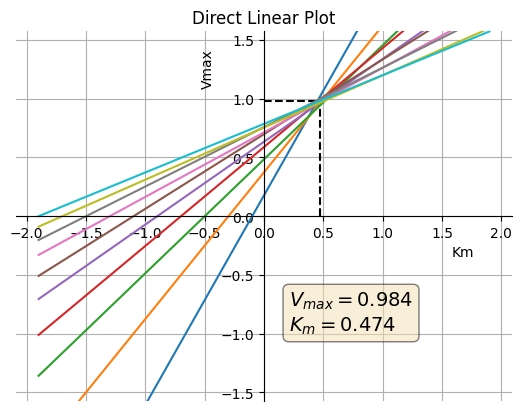

In [11]:
#@title Carregue no botão "Play" para produzir o gráfico
### Eisenthal Cornish-Bowden direct linear plot

# Get concentrations and velocities from the dataframe
if nrepl > 1 :
  v = np.array(enz_data.iloc[:,1:-2])
else:
  v = np.array(enz_data.iloc[:,1:])
s = np.array(enz_data['[A]'])

# Set up things
vm = v.mean(axis=1) # use the mean of replicates
x = np.linspace(-s.max(),s.max(),10)
int_Vmax = []
int_Km = []
mmlines = np.vstack((vm/s,vm)).T
n_int = len(s)*(len(s)-1)//2
#Km_int = np.zeros(n_int)
#Vmax_int = np.zeros(n_int)

# Plot the lines
for m, b in mmlines:
  plt.plot(x,m*x+b)

# Copmpute intersections
print("Computing {:d} intersections\n".format(n_int))
for i in range(mmlines.shape[0]):
  for j in range(i):
    m1, b1 = mmlines[i]
    m2, b2 = mmlines[j]
    x = (b2-b1)/(m1-m2)
    y = (b2*m1-b1*m2)/(m1-m2)
    int_Km.append(x)
    int_Vmax.append(y)
    #print(x,y)
    #pass
    #print(i,j,mmlines[i],mmlines[j])rray python

# # tweak the plot appearance
ax = plt.gca()
ax.set_title("Direct Linear Plot")
ax.axis([-1.1*s.max(),1.1*s.max(),-2*vm.max(),2*vm.max()])
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel("Km",x=0.9)
ax.set_ylabel("Vmax",y=0.9)
# # Remove zeros on x an y axis
# import matplotlib.ticker as ticker
# func = lambda x, pos: "" if np.isclose(x,0) else x
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(func))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(func))

# Compute estimates
ECB_Km = np.median(int_Km)
ECB_Vmax = np.median(int_Vmax)

# draw dashed lines on the medians
ax.vlines(ECB_Km,0,ECB_Vmax,linestyles='dashed')
ax.hlines(ECB_Vmax,0,ECB_Km, linestyles='dashed')

# Place a box with the estimates
textstr = '\n'.join((
    r'$V_{max}=%.3g$' % (ECB_Vmax, ),
    r'$K_m=%.3g$' % (ECB_Km, ))) 
    #r'$\sigma=%.2f$' % (sigma, ))))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.55, 0.30, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

print("Direct Linear plot estimates:") 
print("    Km = {:5.3g}, Vmax= {:5.3g}".format(ECB_Km, ECB_Vmax))
print()
print()

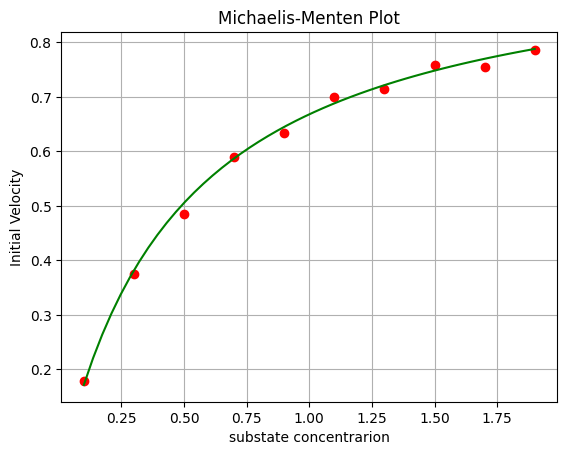

In [17]:
#@title Carregue em "Play" para visualizar o gráfico de v *versus* [A]
ax = plt.gca()
ax.set_title('Michaelis-Menten Plot')
ax.set_xlabel("substate concentrarion",x=0.5)
ax.set_ylabel("Initial Velocity",y=0.5)
#ax.axis([0, 3*ECB_Km, 0, 1.1*ECB_Vmax])
_ = ax.plot(data_np[:,0],data_np[:,1],'ro')
sm_data = np.linspace(data_np[0,0],data_np[-1,0],50)
_ = ax.plot(sm_data,MM(ECB_Km, ECB_Vmax, sm_data),'g-')
